## Import Data


In [1]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# === 1. Load & Cleaning ===
data = pd.read_csv("DukuhKupang.csv")
drop_cols = ['Datetime','Timezone','AQI CN','AQI US','HCHO (ppb)','TVOC (ppb)']
data = data.drop(columns=drop_cols).dropna().drop_duplicates()

In [3]:
print(data.isna().sum())
print(data.isnull().sum())
print(data.duplicated().sum())

PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64
PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64
0


In [5]:
data = data.dropna()
data = data.drop_duplicates()
data.duplicated().sum()

0

In [6]:
from scipy import stats
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(data))
data_cleaned = data[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [7]:
print("Final shape setelah cleaning:", data_cleaned.shape)

Final shape setelah cleaning: (37486, 6)


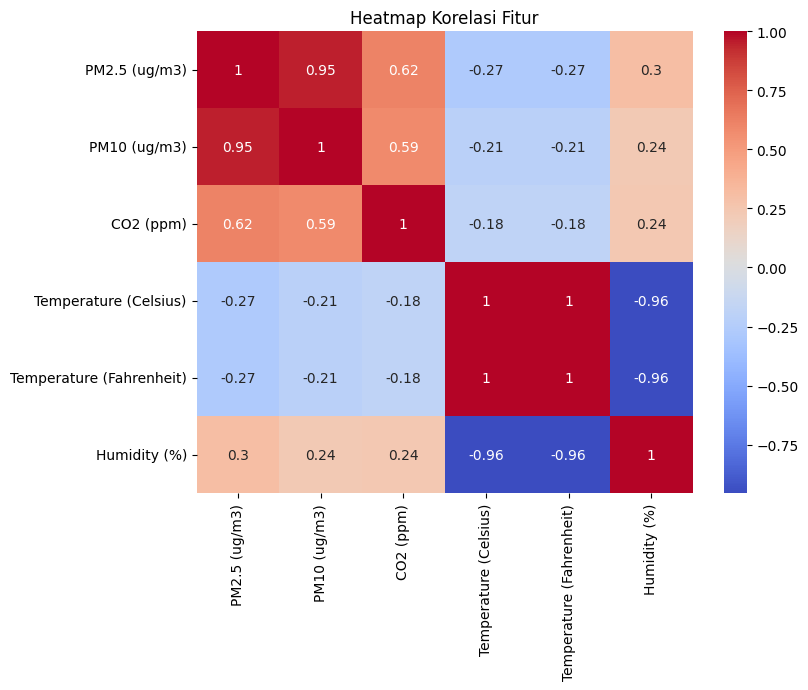

In [8]:
# --- 4. Visualisasi Korelasi ---
plt.figure(figsize=(8,6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Prepocessing

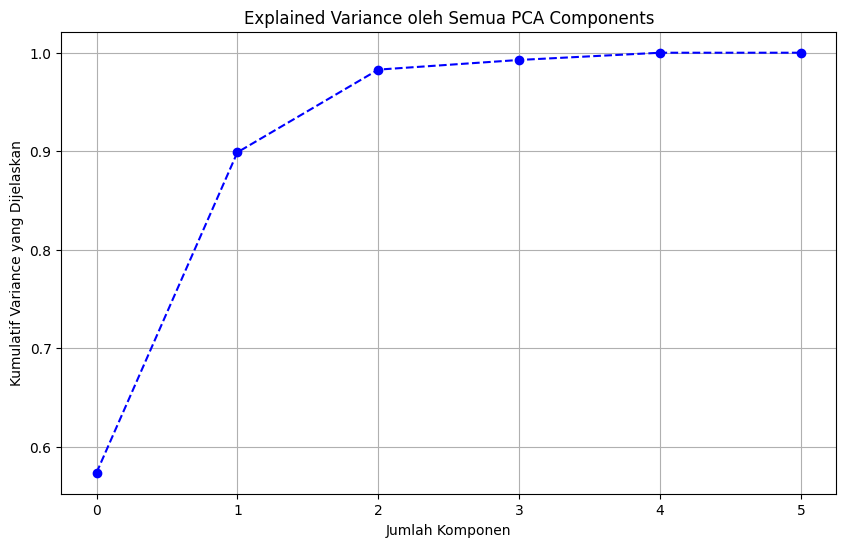

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# === PCA untuk semua komponen ===
pca_full = PCA()  # tanpa n_components, supaya semua komponen dihitung
X_train_pca_full = pca_full.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh Semua PCA Components')
plt.grid(True)
plt.show()


In [11]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (2 components):", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio (2 components): [0.5738042  0.32512566 0.08393476]
Total explained variance: 0.9828646182879363


# CLustering

===== K-MEANS CLUSTERING =====


Clustering progress:  11%|█         | 1/9 [00:11<01:29, 11.17s/it]

k=2, Silhouette Score=0.3971, Davies-Bouldin Index=0.9349


Clustering progress:  22%|██▏       | 2/9 [00:22<01:20, 11.46s/it]

k=3, Silhouette Score=0.4229, Davies-Bouldin Index=0.8638


Clustering progress:  33%|███▎      | 3/9 [00:34<01:09, 11.51s/it]

k=4, Silhouette Score=0.3432, Davies-Bouldin Index=0.9865


Clustering progress:  44%|████▍     | 4/9 [00:46<00:57, 11.58s/it]

k=5, Silhouette Score=0.3367, Davies-Bouldin Index=0.9690


Clustering progress:  56%|█████▌    | 5/9 [00:57<00:46, 11.65s/it]

k=6, Silhouette Score=0.3340, Davies-Bouldin Index=1.0597


Clustering progress:  67%|██████▋   | 6/9 [01:10<00:35, 11.83s/it]

k=7, Silhouette Score=0.3030, Davies-Bouldin Index=1.1236


Clustering progress:  78%|███████▊  | 7/9 [01:22<00:23, 11.94s/it]

k=8, Silhouette Score=0.3098, Davies-Bouldin Index=1.0514


Clustering progress:  89%|████████▉ | 8/9 [01:34<00:12, 12.08s/it]

k=9, Silhouette Score=0.2917, Davies-Bouldin Index=1.0292


Clustering progress: 100%|██████████| 9/9 [01:46<00:00, 11.84s/it]

k=10, Silhouette Score=0.2925, Davies-Bouldin Index=1.0433


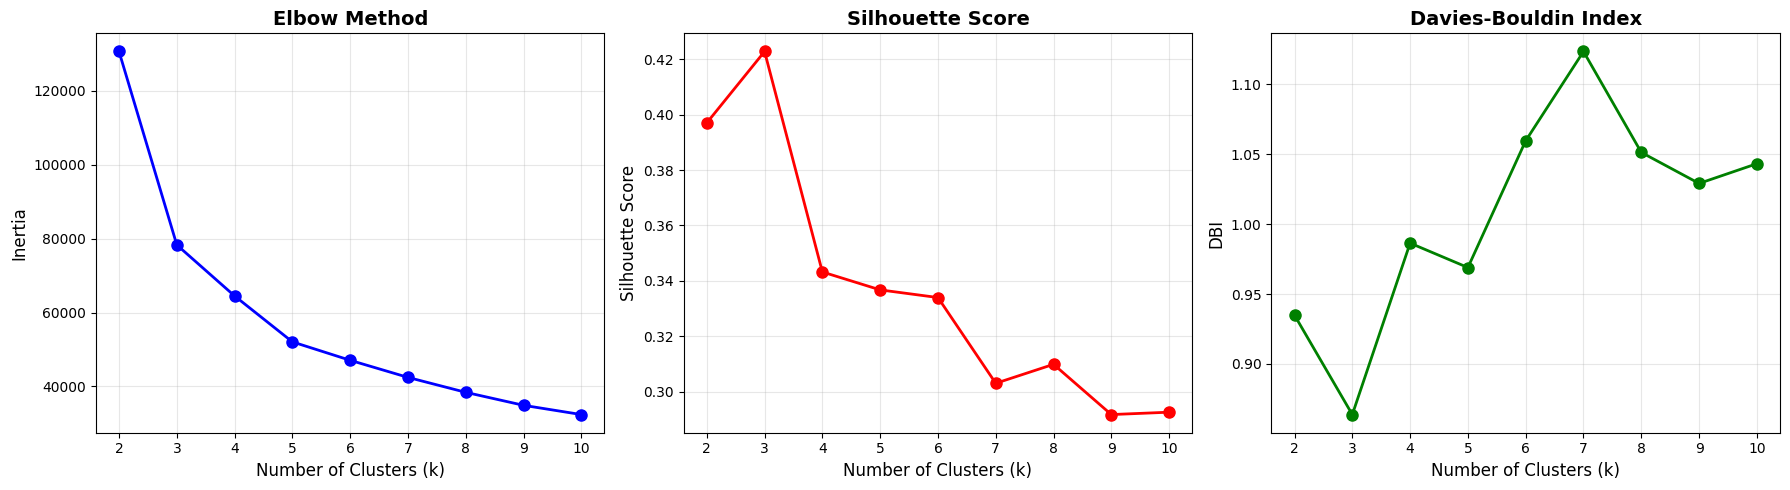

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from tqdm import tqdm
# ==============================
# 1️⃣ K-MEANS CLUSTERING
# ==============================
K_range = range(2, 11)  # Range jumlah cluster yang diuji
inertias = []           # Menyimpan total jarak ke centroid (Elbow)
sil_scores = []         # Menyimpan Silhouette Score
dbi_scores = []         # Menyimpan Davies-Bouldin Index

print("===== K-MEANS CLUSTERING =====")
for k in tqdm(K_range, desc="Clustering progress"):
    # Inisialisasi KMeans
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Latih model dan prediksi cluster
    labels_temp = kmeans_temp.fit_predict(X_pca)
    
    # Simpan metric
    inertias.append(kmeans_temp.inertia_)  # total jarak titik ke centroid
    sil_score = silhouette_score(X_pca, labels_temp)  # 0–1, semakin tinggi semakin bagus
    sil_scores.append(sil_score)
    dbi_score = davies_bouldin_score(X_pca, labels_temp)  # semakin kecil semakin bagus
    dbi_scores.append(dbi_score)
    
    print(f"k={k}, Silhouette Score={sil_score:.4f}, Davies-Bouldin Index={dbi_score:.4f}")

# ==============================
# Plot K-Means Evaluation Metrics
# ==============================
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# 2. Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

# 3. Davies-Bouldin Index
ax[2].plot(K_range, dbi_scores, 'go-', linewidth=2, markersize=8)
ax[2].set_title('Davies-Bouldin Index', fontsize=14, fontweight='bold')
ax[2].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[2].set_ylabel('DBI', fontsize=12)
ax[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
# === 4. KMeans Clustering ===
k = 3  # bisa pakai hasil dari elbow/silhouette loop sebelumnya
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(X_pca)

# Evaluasi cluster
sil = silhouette_score(X_pca, train_clusters)
dbi = davies_bouldin_score(X_pca, train_clusters)
print(f"Silhouette Score = {sil:.4f}, Davies-Bouldin Index = {dbi:.4f}")


Silhouette Score = 0.4229, Davies-Bouldin Index = 0.8638


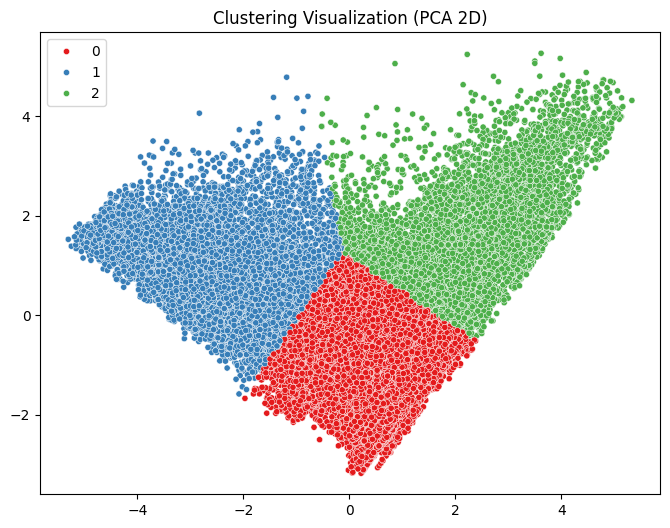

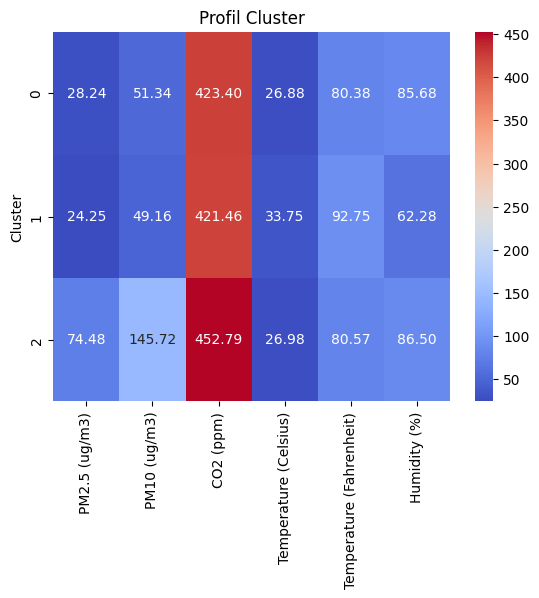

In [16]:
# Visualisasi PCA 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=20)
plt.title("Clustering Visualization (PCA 2D)")
plt.show()

# === 5. Profil Cluster ===
X_train_copy = data_cleaned.copy()
X_train_copy["Cluster"] = train_clusters
cluster_profile = X_train_copy.groupby("Cluster").mean()
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster")
plt.show()


=== Crosstab Cluster vs AQI Category ===
AQI_Category  Good  Moderate  Poor  Satisfactory  Severe  Very Poor
Cluster                                                            
0             9594       609     0          9480      24          0
1             6046       573     2          3475      24          0
2                3      4490  1360          1253     232        321


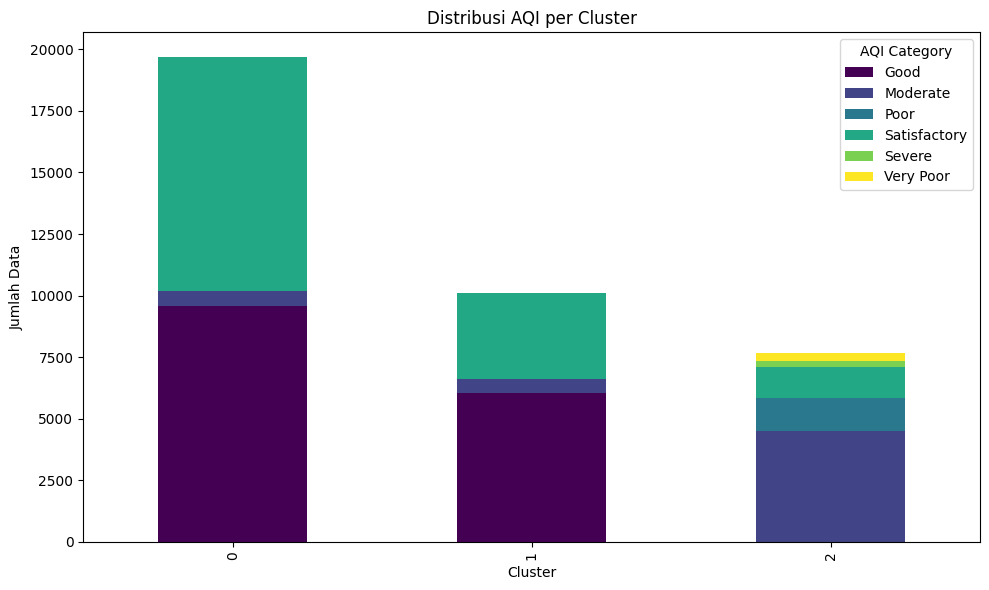

In [17]:
# === 6. Mapping AQI ===
breakpoints = {
    "PM2.5 (ug/m3)": [
        (0,30,0,50),
        (31,60,51,100),
        (61,90,101,200),
        (91,120,201,300),
        (121,250,301,400),
        (251,500,401,500)  # tambahan agar lebih luas
    ],
    "PM10 (ug/m3)": [
        (0,50,0,50),
        (51,100,51,100),
        (101,250,101,200),
        (251,350,201,300),
        (351,430,301,400),
        (431,600,401,500)  # tambahan agar lebih luas
    ]
}

def calc_subindex(pollutant, conc):
    for Bmin, Bmax, Imin, Imax in breakpoints[pollutant]:
        if Bmin <= conc <= Bmax:
            return ((Imax - Imin) / (Bmax - Bmin)) * (conc - Bmin) + Imin
    return np.nan

def calc_aqi(row):
    return max(
        calc_subindex("PM2.5 (ug/m3)", row["PM2.5 (ug/m3)"]),
        calc_subindex("PM10 (ug/m3)", row["PM10 (ug/m3)"])
    )

def categorize_aqi(val):
    if val <= 50: return "Good"
    elif val <= 100: return "Satisfactory"
    elif val <= 200: return "Moderate"
    elif val <= 300: return "Poor"
    elif val <= 400: return "Very Poor"
    else: return "Severe"

# Hitung AQI untuk data train copy
X_train_copy["AQI_Value"] = X_train_copy.apply(calc_aqi, axis=1)
X_train_copy["AQI_Category"] = X_train_copy["AQI_Value"].apply(categorize_aqi)

# --- 10. Crosstab Cluster vs AQI Category ---
crosstab = pd.crosstab(X_train_copy["Cluster"], X_train_copy["AQI_Category"])
print("=== Crosstab Cluster vs AQI Category ===")
print(crosstab)

# Plot distribusi AQI per cluster
crosstab.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10,6), 
    colormap="viridis"
)
plt.title("Distribusi AQI per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.legend(title="AQI Category")
plt.tight_layout()
plt.show()


=== Metrics table ===
        n_clusters  total_labels                 cluster_counts  silhouette  \
method                                                                        
KMeans           3             3  {0: 19707, 1: 10120, 2: 7659}    0.422857   

             dbi  calinski_harabasz  
method                               
KMeans  0.863751       34165.542627  


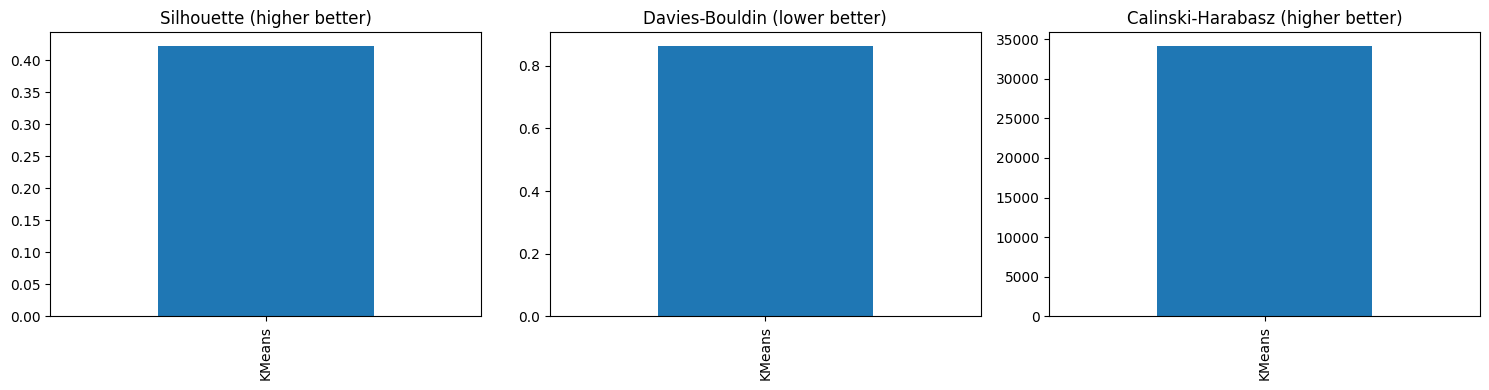

In [19]:
# === Kode: bandingkan metrik clustering secara rapi ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# --- Pastikan labels dan fitur ada ---
# labels_kmeans: hasil predict KMeans pada X_train_pca
# labels_dbscan: hasil predict DBSCAN pada X_train_pca (noise -> -1)
# labels_ahc: hasil predict Agglomerative pada X_train_scaled (atau X_train_pca jika ingin konsisten)
# X_train_pca: data diproyeksikan PCA 2D (untuk visual / perhitungan yang sama)
# X_train_scaled: data ter-scaling (dipakai kalau labels dibuat dari scaled)

# Fungsi bantu: cek validitas cluster sebelum hitung metrik
# === KMeans ===
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_pca)

def valid_for_metrics(labels):
    unique = set(labels)
    # jika DBSCAN, noise = -1; kita masih butuh minimal 2 cluster non-noise
    n_non_noise = len([u for u in unique if u != -1])
    # silhouette requires at least 2 clusters (excluding noise) and more than 1 sample per cluster
    # we'll accept if there are >=2 non-noise clusters and total unique labels >=2
    return (n_non_noise >= 2) and (len(unique) >= 2)

def compute_metrics(name, labels, X_for_metrics):
    row = {"method": name}
    # cluster sizes
    clusters, counts = np.unique(labels, return_counts=True)
    row["n_clusters"] = len([c for c in clusters if c != -1])  # non-noise cluster count
    row["total_labels"] = len(clusters)
    row["cluster_counts"] = dict(zip(clusters.astype(int).tolist(), counts.tolist()))
    
    if not valid_for_metrics(labels):
        # tidak cukup cluster valid untuk menghitung silhouette
        row["silhouette"] = np.nan
        row["dbi"] = np.nan
        row["calinski_harabasz"] = np.nan
        row["note"] = "Not enough valid clusters (or mostly noise)."
        return row
    
    # silhouette: gunakan hanya pada titik non-noise (jika noise ada)
    if -1 in labels:
        mask = (labels != -1)
        labels_for_sil = labels[mask]
        X_for_sil = X_for_metrics[mask]
    else:
        labels_for_sil = labels
        X_for_sil = X_for_metrics
    
    # edge-case: silhouette_score requires at least 2 labels and each label must have >1 sample
    # sklearn will raise if any cluster has size 1; we will catch and set nan with note.
    try:
        row["silhouette"] = silhouette_score(X_for_sil, labels_for_sil)
    except Exception as e:
        row["silhouette"] = np.nan
        row["note_silhouette_error"] = str(e)
    
    try:
        # DBI can be computed with all labels including noise (but -1 treated like cluster)
        row["dbi"] = davies_bouldin_score(X_for_metrics, labels)
    except Exception as e:
        row["dbi"] = np.nan
        row["note_dbi_error"] = str(e)
    
    try:
        # Calinski-Harabasz requires at least 2 clusters (no requirement to remove noise)
        row["calinski_harabasz"] = calinski_harabasz_score(X_for_metrics, labels)
    except Exception as e:
        row["calinski_harabasz"] = np.nan
        row["note_ch_error"] = str(e)
    
    return row

# --- Hitung untuk tiap metode (sesuaikan variable names jika berbeda) ---
results = []
results.append(compute_metrics("KMeans", labels_kmeans, X_pca))
# results.append(compute_metrics("DBSCAN", labels_dbscan, X_train_pca))
# # Untuk AHC: jika kamu membangun labels_ahc dari X_train_scaled, tetap gunakan X_train_scaled,
# # tapi demi konsistensi visual kita bisa juga memberikan X_train_pca. Gunakan yang sesuai.
# results.append(compute_metrics("Agglomerative", labels_ahc, X_train_pca))

df_metrics = pd.DataFrame(results).set_index("method")
# Kolom cluster_counts jadi string agar tampil rapi
df_metrics["cluster_counts"] = df_metrics["cluster_counts"].apply(lambda d: str(d))

print("=== Metrics table ===")
print(df_metrics[["n_clusters","total_labels","cluster_counts","silhouette","dbi","calinski_harabasz"]])

# --- Plot perbandingan metrik (bar chart) ---
plot_df = df_metrics[["silhouette","dbi","calinski_harabasz"]].copy()
plot_df = plot_df.astype(float)

fig, ax = plt.subplots(1,3, figsize=(15,4))
plot_df["silhouette"].plot(kind="bar", ax=ax[0], title="Silhouette (higher better)")
plot_df["dbi"].plot(kind="bar", ax=ax[1], title="Davies-Bouldin (lower better)")
plot_df["calinski_harabasz"].plot(kind="bar", ax=ax[2], title="Calinski-Harabasz (higher better)")
for a in ax:
    a.set_xlabel("")
plt.tight_layout()
plt.show()



=== Random Forest ===
Accuracy: 0.9846015655075068
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.99      0.99      0.99      2363
           2       0.98      0.98      0.98       395
           3       0.97      0.97      0.97      1434
           4       0.98      0.99      0.98      1671
           5       0.99      0.99      0.99      1191

    accuracy                           0.98      7793
   macro avg       0.98      0.98      0.98      7793
weighted avg       0.98      0.98      0.98      7793



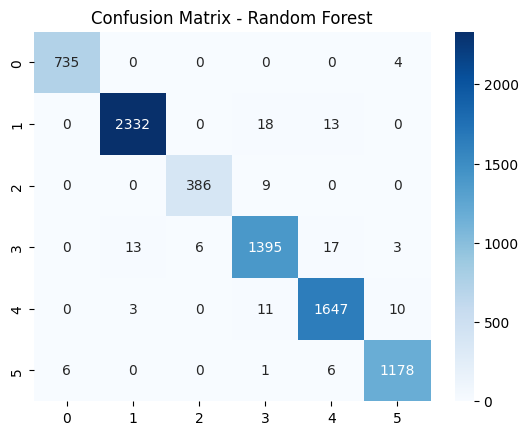


=== SVM ===
Accuracy: 0.9952521493648145
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      0.99      1.00      2363
           2       0.99      0.99      0.99       395
           3       0.99      0.99      0.99      1434
           4       0.99      1.00      0.99      1671
           5       1.00      0.99      1.00      1191

    accuracy                           1.00      7793
   macro avg       1.00      0.99      0.99      7793
weighted avg       1.00      1.00      1.00      7793



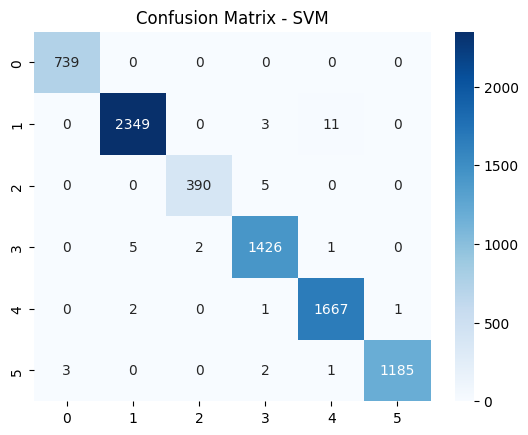


=== KNN ===
Accuracy: 0.9786988322853843
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       739
           1       0.99      0.99      0.99      2363
           2       0.98      0.97      0.98       395
           3       0.97      0.97      0.97      1434
           4       0.97      0.97      0.97      1671
           5       0.98      0.97      0.98      1191

    accuracy                           0.98      7793
   macro avg       0.98      0.98      0.98      7793
weighted avg       0.98      0.98      0.98      7793



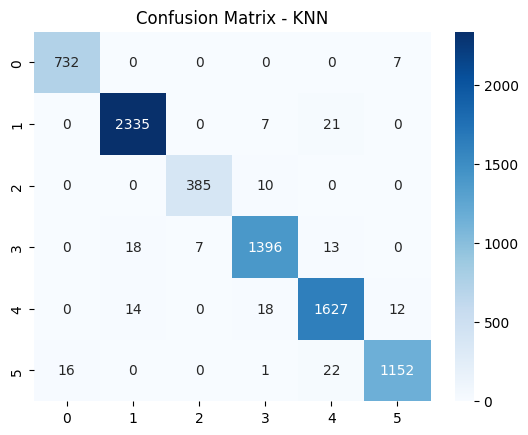


=== Naive Bayes ===
Accuracy: 0.9571410239958937
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       739
           1       0.98      0.96      0.97      2363
           2       0.93      0.92      0.93       395
           3       0.91      0.93      0.92      1434
           4       0.95      0.96      0.95      1671
           5       0.97      0.97      0.97      1191

    accuracy                           0.96      7793
   macro avg       0.95      0.96      0.95      7793
weighted avg       0.96      0.96      0.96      7793



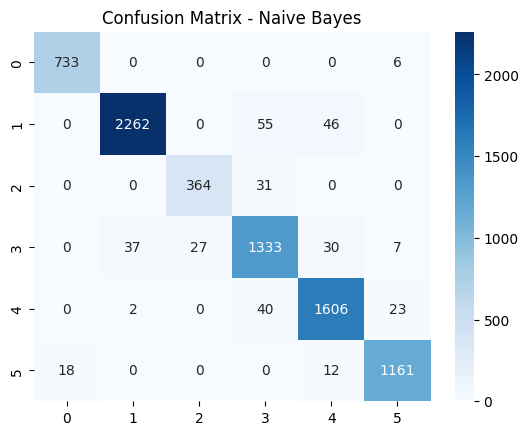


=== Decision Tree ===
Accuracy: 0.9694597715898884
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.98      0.98      0.98      2363
           2       0.95      0.97      0.96       395
           3       0.95      0.94      0.95      1434
           4       0.96      0.97      0.96      1671
           5       0.98      0.98      0.98      1191

    accuracy                           0.97      7793
   macro avg       0.97      0.97      0.97      7793
weighted avg       0.97      0.97      0.97      7793



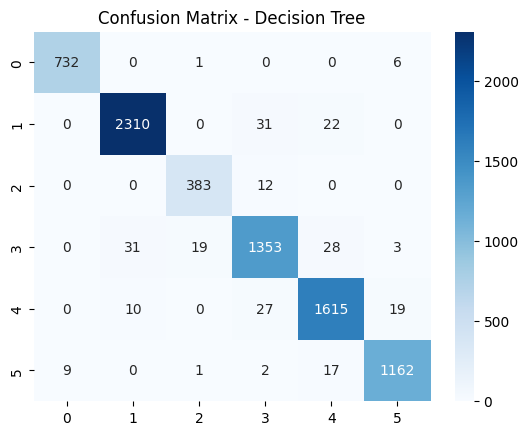

In [ ]:
# # === 7. Klasifikasi Supervised (pakai hasil cluster sebagai label) ===
# X_final = np.vstack([X_train_scaled, X_test_scaled])
# y_final = np.hstack([train_clusters, test_clusters])

# X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
#     X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
# )

# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "SVM": SVC(),
#     "KNN": KNeighborsClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
# }

# for name, model in models.items():
#     model.fit(X_train_cls, y_train_cls)
#     y_pred = model.predict(X_test_cls)
    
#     print(f"\n=== {name} ===")
#     print("Accuracy:", accuracy_score(y_test_cls, y_pred))
#     print(classification_report(y_test_cls, y_pred))
    
#     sns.heatmap(confusion_matrix(y_test_cls, y_pred), annot=True, fmt="d", cmap="Blues")
#     plt.title(f"Confusion Matrix - {name}")
#     plt.show()